In [37]:
# Imports as always...
import RQs
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Beautification.
sns.set_style('darkgrid')
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper')
sns.set_palette('Set2')

# Preparing the Data

In [39]:
data_handler = RQs.DataHandler('edinburgh', 'datasets')

data = data_handler.prepare().iloc[:,4:]
data

c:\University\Queen's University\Winter 2023\CISC 351 - Advanced Data Analytics\Project\Code\RQs.py:319: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = self.master_data.skew().sort_values(ascending=False)


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,host_about_compound,perceived_review_neg,perceived_review_neu,perceived_review_pos,perceived_review_compound,success_score,weighted_image_score_mean,weighted_image_score_max,weighted_image_score_min,weighted_image_score_std
0,0.787670,0.866025,2.328306e-10,0.247876,0.0,0.272832,0.295737,0.666667,1.0,1.0,...,0.870450,0.561286,0.817788,0.132581,0.041820,0.938776,0.400570,0.141856,0.163082,0.437625
1,0.773250,0.500000,1.000000e+00,0.663420,1.0,0.000000,0.071550,0.666667,1.0,1.0,...,0.996931,0.385232,0.635725,0.353250,0.379393,0.399695,0.395768,0.137406,0.148024,0.462536
2,0.772623,0.500000,1.000000e+00,0.922745,0.0,0.221065,0.232241,0.666667,1.0,1.0,...,0.639400,0.371243,0.580182,0.410288,0.741326,0.582015,0.382437,0.110447,0.238550,0.421143
3,0.770324,0.500000,1.000000e+00,0.470253,0.0,0.084055,0.071550,1.000000,1.0,1.0,...,0.614347,0.325429,0.671621,0.322865,0.607755,0.248321,0.522731,0.141852,0.184839,0.448539
4,0.770115,0.707107,1.000000e+00,0.040607,1.0,0.000000,0.000000,0.666667,1.0,1.0,...,0.286867,0.375299,0.586874,0.403193,0.625079,0.162259,0.262754,0.162831,0.001966,0.503284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,0.831139,0.866025,1.000000e+00,1.000000,0.0,0.000000,0.000000,0.666667,1.0,0.0,...,0.924126,0.369573,0.569168,0.421504,0.214165,0.090196,0.223862,0.128206,0.088885,0.447441
4625,0.825496,0.500000,1.000000e+00,0.922745,0.0,0.257727,0.243783,1.000000,1.0,1.0,...,0.921056,0.401211,0.709473,0.277572,0.675612,0.000000,0.431084,0.161110,0.199569,0.437589
4626,0.825496,0.500000,1.000000e+00,0.922745,0.0,0.257727,0.243783,1.000000,1.0,1.0,...,0.921056,0.439355,0.643248,0.337983,0.326703,0.261196,0.377051,0.170144,0.202395,0.436743
4627,0.819436,0.707107,1.000000e+00,0.123574,1.0,0.000000,0.071550,0.666667,1.0,1.0,...,0.996074,0.422192,0.622545,0.362035,0.739942,0.378876,0.457884,0.141252,0.132508,0.431728


# RQ3

In [40]:
# Define the structured-only, unstructured-only, and hybrid datasets.
structured_features = [
    'host_since', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
    'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'has_availability',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
    'first_review', 'last_review', 'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'reviews_per_month'
]

unstructured_features = [
    'title_neg', 'title_neu', 'title_pos', 'title_compound',
    'description_neg', 'description_neu', 'description_pos',
    'description_compound', 'neighborhood_overview_neg',
    'neighborhood_overview_neu', 'neighborhood_overview_pos',
    'neighborhood_overview_compound', 'host_about_neg', 'host_about_neu',
    'host_about_pos', 'host_about_compound', 'perceived_review_neg',
    'perceived_review_neu', 'perceived_review_pos',
    'perceived_review_compound',
    'weighted_image_score_mean', 'weighted_image_score_max',
    'weighted_image_score_min', 'weighted_image_score_std'
]

hybrid_features = structured_features + unstructured_features

experiment = RQs.RQ3(data, structured_features, unstructured_features, hybrid_features)
results = experiment.run().reset_index().iloc[:,1:]
results

,Model,Dataset,MAE,MSE,R2 Score
0,Linear Regression,Structured,0.015805,0.096527,0.619100
1,Linear Regression,Unstructured,0.040288,0.160954,0.079983
2,Linear Regression,Hyrbid,0.015661,0.217570,0.637674
3,Support Vector Regression (SVR),Structured,0.012279,0.083979,0.704078
4,Support Vector Regression (SVR),Unstructured,0.039415,0.157076,0.099932
5,Support Vector Regression (SVR),Hyrbid,0.013659,0.220327,0.683983
6,Multi-Layer Perceptron (MLP),Structured,0.013714,0.088352,0.669499
7,Multi-Layer Perceptron (MLP),Unstructured,0.038693,0.156673,0.116417
8,Multi-Layer Perceptron (MLP),Hyrbid,0.013884,0.220900,0.678796
9,Gaussian Process Regression,Structured,0.125715,0.230327,-2.029733


Text(0, 0.5, '')

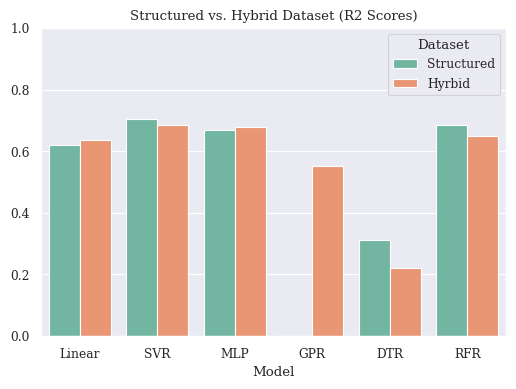

In [41]:
# Plot R2 scores...
data = results.replace({
    'Linear Regression' : 'Linear',
    'Support Vector Regression (SVR)' : 'SVR',
    'Multi-Layer Perceptron (MLP)' : 'MLP',
    'Gaussian Process Regression' : 'GPR',
    'Decision Tree Regression' : 'DTR',
    'Random Forest Regression' : 'RFR'
})[results['Dataset'] != 'Unstructured']

fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(
    data=data, 
    x='Model', y='R2 Score', hue='Dataset',
    ax = ax
)

ax.set_ylim(0,1)
ax.set_title('Structured vs. Hybrid Dataset (R2 Scores)')
ax.set_ylabel('')